Importing Various dependencies

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

Data loading and Processing

In [76]:
#load heart disease data to panda dataframe
heart_disease = pd.read_csv("/Users/maryam/Desktop/heart 2.csv", na_values = '?')

In [77]:
#print first 5 columnns
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [78]:
#print 5 last columns
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [79]:
#data information
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [80]:
#check sum of missing values in each columns
heart_disease.isnull().sum()

#there is no null value in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [81]:
#statiscal description of each columns
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [82]:
#checks the amount of times a value occurs
heart_disease["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

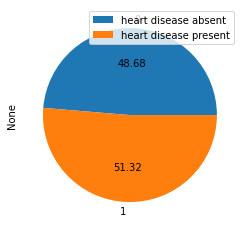

In [83]:
heart_disease.groupby("target").size().plot(kind ="pie", autopct = "%.2f")
labels = ["heart disease absent", "heart disease present"]
plt.legend(labels)

Dummies using panda ro convert categorical value to one-hot encoding

In [84]:
#converts categorical value to one-hot encoding 
heart_disease = pd.get_dummies(heart_disease,columns = ["cp"])

In [85]:
#outputs dataset with new columns
heart_disease.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,52,1,125,212,0,1,168,0,1.0,2,2,3,0,1,0,0,0
1,53,1,140,203,1,0,155,1,3.1,0,0,3,0,1,0,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0,3,0,1,0,0,0
3,61,1,148,203,0,1,161,0,0.0,2,1,3,0,1,0,0,0
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0,1,0,0,0


In [86]:
#outputs all columns
heart_disease.columns


Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'cp_0', 'cp_1', 'cp_2',
       'cp_3'],
      dtype='object')

In [87]:
#separate the features into numerical and categorical data
numerical_cols = ["age", "trestbps", "chol","thalach","oldpeak"]
categorical_cols = list(set(heart_disease.columns) - set(numerical_cols)- {"target"})

In [88]:
categorical_cols

['exang',
 'cp_0',
 'cp_1',
 'slope',
 'cp_3',
 'restecg',
 'cp_2',
 'ca',
 'thal',
 'fbs',
 'sex']

In [89]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Splitting dataset

In [90]:
heart_disease_train, heart_disease_test = train_test_split(heart_disease,test_size = 0.2, random_state = 3)

In [91]:
len(heart_disease_train), len(heart_disease_test)

(820, 205)

In [92]:
scaler = StandardScaler()
def get_features_and_target_arrays(heart_disease,numerical_cols,categorical_cols,scaler):
    x_numeric_scaled = scaler.fit_transform(heart_disease[numerical_cols])
    x_categorical = heart_disease[categorical_cols].to_numpy()
    x = np.hstack((x_categorical, x_numeric_scaled))
    y = heart_disease["target"]
    
    return(x,y)

In [93]:
x_train, y_train = get_features_and_target_arrays(heart_disease_train, numerical_cols, categorical_cols, scaler)

In [94]:
x_test, y_test = get_features_and_target_arrays(heart_disease_test, numerical_cols, categorical_cols, scaler)

In [95]:
#LogisticRegression
hlf = LogisticRegression()
hlf.fit(x_train,y_train)
test_pred = hlf.predict(x_test)

In [96]:
#DecisionTreeClassifier
dc_clf = DecisionTreeClassifier()
dc_clf.fit(x_train,y_train)
dlf_pred = dc_clf.predict(x_test)


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
1020,59,1,140,221,0,1,164,1,0.0,2,0,2,1,0,1,0,0
1021,60,1,125,258,0,0,141,1,2.8,1,1,3,0,1,0,0,0
1022,47,1,110,275,0,0,118,1,1.0,1,1,2,0,1,0,0,0
1023,50,0,110,254,0,0,159,0,0.0,2,0,2,1,1,0,0,0
1024,54,1,120,188,0,1,113,0,1.4,1,1,3,0,1,0,0,0


In [99]:
#SupportVectorMachine
svc_clf = SVC()
svc_clf.fit(x_train,y_train)
svc_pred = svc_clf.predict(x_test)


Models Evaliuation and accuracy

The accuracy score on logistic regression model is:  0.824390243902439
The classification report on LR model is: 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81       106
           1       0.76      0.93      0.84        99

    accuracy                           0.82       205
   macro avg       0.84      0.83      0.82       205
weighted avg       0.84      0.82      0.82       205

The confusion matrix on LR model is: 
 [[77 29]
 [ 7 92]]


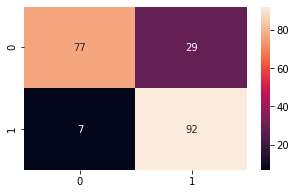

In [105]:
#logisticRegression
print("The accuracy score on logistic regression model is: ", accuracy_score(y_test,test_pred))
print ("The classification report on LR model is: \n",classification_report(y_test,test_pred))
cm = confusion_matrix(y_test,test_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot = True)
print ("The confusion matrix on LR model is: \n",confusion_matrix(y_test,test_pred))


The accuracy score on SupportVectorMachine is:  0.9024390243902439
The classification report on LR model is: 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       106
           1       0.85      0.97      0.91        99

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.91      0.90      0.90       205

The confusion matrix on LR model is: 
 [[89 17]
 [ 3 96]]


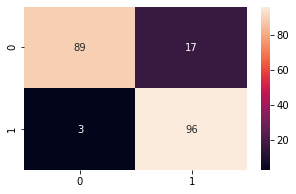

In [104]:
#SupportVectorMachine

print("The accuracy score on SupportVectorMachine is: ", accuracy_score(y_test,svc_pred))
print("The classification report on LR model is: \n", classification_report(y_test,svc_pred))
cm = confusion_matrix(y_test,svc_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot = True)
print("The confusion matrix on LR model is: \n", confusion_matrix(y_test,svc_pred))


The accuracy score on DecisionTreeClassifier is:  0.9463414634146341
The confusion matrix on DTC model is: 

The cclassification report on DTC model is: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       106
           1       0.93      0.96      0.95        99

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



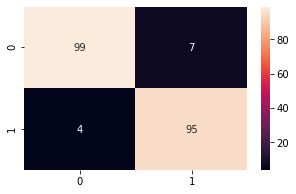

In [107]:
#### DecisionTreeClassifier(DTC)

print("The accuracy score on DecisionTreeClassifier is: ", accuracy_score(y_test,dlf_pred))
print ("The cclassification report on DTC model is: \n",classification_report(y_test,dlf_pred))
cm = confusion_matrix(y_test,dlf_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot = True)
print ("The confusion matrix on DTC model is: \n",)


Building the heart disease predictive model

In [109]:
input_data = (59,1,140,221,0,1,164,1,0.0,2,0,2,1,0,1,0
) 
# target is 0
#convert input data to a numpy array
numpy_data = np.asarray(input_data)
#reshape the numpy array to allow for prediction
numpy_data_reshape = numpy_data.reshape(1,-1)
#using RandomForestClassifier
prediction = dc_clf.predict(numpy_data_reshape)
print(prediction)
if (prediction[0] == 1):
  print("The Person is predicted to have heart disease")
else:
  print("The person is predicted to not have heart disease")

[0]
The person is predicted to not have heart disease
